In [8]:
import os
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import seaborn as sns
from string import ascii_letters
import math 
import random
import pickle
import codecs
import random
# %matplotlib inline

In [9]:
folder_folders = os.walk("/home/alone/Documents/Spectroradiometer_caliberation/find_straight_line")
folder_list = []
folder_names = []
for root, dirs, files in os.walk("/home/alone/Documents/Spectroradiometer_caliberation/find_straight_line", topdown=False):
    for name in dirs:
        if not os.path.isfile(os.path.join(root, name)):
            folder_list.append(os.path.join(root, name))
            folder_names.append(name)
            print (os.path.join(root, name))
# print(folder_list)
print(folder_names)

all_data_dict = {}
for k in range(len(folder_list)):
    all_data = pd.DataFrame(columns=["Lambda"])
    file_list = os.listdir(folder_list[k])
    for j in range(len(file_list)):
        raw_data = open(os.path.join(folder_list[k],file_list[j]), "r")
        f = raw_data.readlines()
        usable_part = f[78:459]
        usable_part = [i.split("  ") for i in usable_part]
        data = pd.DataFrame(usable_part)
        for index,rows in data.iterrows():
            re_pattern = r"(.*)\n"
            data.set_value(index, 2, re.search(re_pattern, rows[2]).group(1))
        data.columns=["Lambda","target","ref"]
        data.ref=pd.to_numeric(data.ref)
        data.target=pd.to_numeric(data.target)
        Reflectance=(data.target)/(data.ref)
        data=data.drop("ref",1)
        data=data.drop("target",1)
        if all_data["Lambda"].empty:
            all_data["Lambda"] = data["Lambda"]
        all_data["R"+str(j+1)]=Reflectance
    all_data_dict [folder_names[k]] = all_data
    
print("All_data_dict is a dictionary where key is folder name and stored values are dataFrame consists of reflectance values of that folder ")

/home/alone/Documents/Spectroradiometer_caliberation/find_straight_line/dirty_part
/home/alone/Documents/Spectroradiometer_caliberation/find_straight_line/pure_part
/home/alone/Documents/Spectroradiometer_caliberation/find_straight_line/not_ploished_plywood
/home/alone/Documents/Spectroradiometer_caliberation/find_straight_line/shiny_polished_plywood
/home/alone/Documents/Spectroradiometer_caliberation/find_straight_line/slight_dirty
['dirty_part', 'pure_part', 'not_ploished_plywood', 'shiny_polished_plywood', 'slight_dirty']


/home/alone/.local/lib/python3.5/site-packages/ipykernel_launcher.py:25: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead


All_data_dict is a dictionary where key is folder name and stored values are dataFrame consists of reflectance values of that folder 


     Lambda        R1        R2        R3
376  992.69  1.032258  1.046371  0.991935
377  994.18  1.012195  1.046748  0.987805
378  995.67  1.041841  1.046025  0.991632
379  997.16  1.060606  1.069264  1.023810
380  998.65  0.997877  1.021231  0.951168


([<matplotlib.axis.XTick at 0x7fe1d8a440f0>,
 <a list of 12 Text xticklabel objects>)

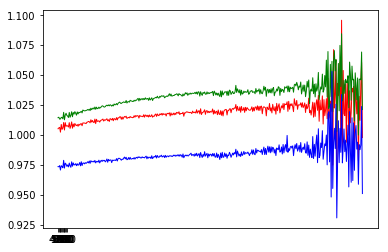

In [73]:
pure=all_data_dict["pure_part"]
print(pure.tail())
plt.plot(pure.Lambda,pure.R1,color='r',linewidth=1)
plt.plot(pure.Lambda,pure.R2,color='g',linewidth=1)
plt.plot(pure.Lambda,pure.R3,color='b',linewidth=1)

plt.xticks(range(12),range(400, 1000, 50))
# ax=plt.gca()
# print(ax)
# ax.set_ylim([0,1.2])
# ax.set_xticks(pure.Lambda, minor=True)
# ax.set_xlim([400.35,998.65])
# ax.set_xticks(np.arange(min(pure.Lambda),))
# plt.tight_layout()
# plt.show()

In [ ]:
dirt=all_data_dict["dirty_part"]
plt.plot(dirt.Lambda)